In [277]:
import numpy as np

# 定义目标函数

In [278]:
# 定义目标函数
def aimfun(x):
    return 10*np.sin(5*x)+7*abs(x-5)+10

# 生成种群

In [279]:
def GenPro(num,lens):
    return np.random.randint(0,2,size=(num,lens))

# 解码

In [280]:
def GenTrans(gen):
    # 先把数据变成字符串
    gen = gen.astype(str)
    # 把数组变成列表
    gen_list = list(gen)
    # 把列表中的元素用空格连接起来，转成10进制
    gen_10 = int("".join(gen_list),2)
    return gen_10*0.00001

# 基因交换函数

In [281]:
def GenExchange(gen1,gen2):
    pointloc =np.random.randint(0,len(gen1))
    new_gen1 = np.concatenate((gen1[:pointloc],gen2[pointloc:]))
    new_gen2 = np.concatenate((gen2[:pointloc],gen1[pointloc:]))
    # 两个样本随机取一个
    if np.random.random() <0.5:
        return new_gen1
    else:
        return new_gen2

# 定义相关参数

In [282]:
num =20 # 种群个数
lens = 20 # 二进制编码长度
Maxiter =10

# 选择

In [283]:
x=[]
y=[]
# 生成基因种群
Gen_test=GenPro(num=num,lens=lens)
for it in range(Maxiter):
    # 定义一下适应值的空间
    gen_value = np.ones(num)
    # 同时记录对应解
    gen_x = np.ones(num)
    for gn,ge in enumerate(Gen_test):
        gen_x[gn] = GenTrans(ge)
        gen_value[gn] = aimfun(GenTrans(ge))

    # 根据适应度找最优的基因
    best_index = np.argmin(gen_value)
    # 提取最优秀基因
    best_gen = Gen_test[best_index,:] # 最优基因

    # 输出本次迭代的最小y值
    y.append(np.min(gen_value))
    # 输出对应的x值
    x.append(gen_x[best_index])

    # 更新基因
    # 将最优基因与其他基因进行杂交
    for g,gen in enumerate(Gen_test):
        Gen_test[g] = GenExchange(gen,best_gen)



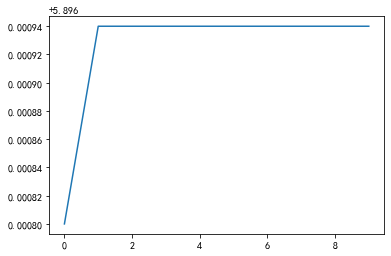

In [284]:
import matplotlib.pyplot as plt
plt .rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt .rcParams['axes.unicode_minus']=False # 用来正常显示负号
plt.plot(x)

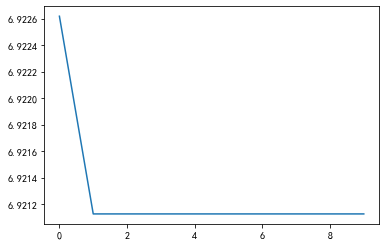

In [285]:
plt.plot(y)